![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia e polinômios originais**: Luan Lima

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Analisando o método de Newton

## Questão 1: Implementação e testes simples

Implemente abaixo a função `newton_pts`, que executa o método de Newton,
retornando todos os pontos percorridos pelo algoritmo até atingir algum critério de parada.
Utilize como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    pts = []
    for i in range(maxiter):
        step = f(x)/df(x)
        newx = x - step
        pts.append(x)
        if abs(step) < xtol:
            if newx > 0:
                pts.append(newx)
            return pts
        if abs(f(x)) < ytol:
            if newx > 0:
                pts.append(newx)            
            return pts
        x = newx
    return pts

In [3]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.isclose(zs[-1], 0)
assert 5 <= len(zs) <= 6

In [4]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.abs(zs[-2]-zs[-3]) >= 1e-8

In [5]:
def make_f(a):
    def f(x):
        return np.exp(x)-a
    return f
def df(x): return np.exp(x)

for a in range(2,11):
    f = make_f(a)
    zs = newton_pts(f,df,0,ytol=0)
    assert np.isclose(zs[-1], np.log(a))
    assert np.abs(zs[-1]-zs[-2]) <= 1e-8
    assert np.abs(zs[-2]-zs[-3]) >= 1e-8

## Questão 2: Uma equação trigonométrica

Vamos utilizar os nossos métodos para achar uma solução para uma equação difícil de resolver "na mão":

$$ \sin(x^2) = \cos(x)^2. $$

In [6]:
def f1(x): return np.sin(x**2)
def f2(x): return np.cos(x)**2

Faça um gráfico das funções $\sin(x^2)$ e $\cos(x)^2$ abaixo.

Com a ajuda do gráfico, defina um ponto inicial $x_0$
para o método de Newton encontrar a primeira raiz positiva da equação.

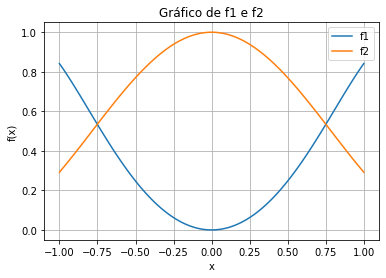

In [7]:
x = np.linspace(-1,1,num=100)
y1 = f1(x)
y2 = f2(x)
plt.plot(x,y1, label='f1')
plt.plot(x,y2, label='f2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.title('Gráfico de f1 e f2')
ax = plt.gca();

In [8]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Faça um gráfico mostrando a evolução do erro em $y$, em função do número de passos efetuados.

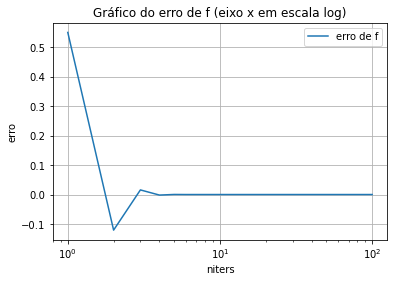

In [26]:
def f(x): return np.sin(x**2)-np.cos(x)**2
def df(x): return 2*x*np.cos(x**2)+np.sin(2*2)
x = np.linspace(1,100, num=100)
x1 = np.array(newton_pts(f,df,1,xtol=0,ytol=0))
y = f(x1)
plt.semilogx(x,y, label='erro de f')
plt.xlabel('niters')
plt.ylabel('erro')
plt.legend()
plt.grid()
plt.title('Gráfico do erro de f (eixo x em escala log)')
ax = plt.gca();

In [10]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente o resultado.

Você acha que seria uma boa ideia fazer um gráfico do erro em $x$ nesse caso?
Porquê?

YOUR ANSWER HERE

## Questão 3: Polinômios em `Python`

Para não precisar ficar implementando polinômio por polinômio,
implemente uma função `cria_poli(coefs)` que retorna uma (outra) função `poli(x)`,
que computa o valor do polinômio

$p(X)=$ `coefs[0]`  $+$ `coefs[1]` $X+$ `coefs[2]` $X^2+\dots+$ `coefs[-1]` $X^n$

em $X=$`x`.
As funções de polinômios do `numpy` (`poly1d`, `polyval`, `polyder`) podem lhe ser úteis :-)

No mesmo espírito, crie a função `cria_derivada_poli(coefs)`,
que retorna uma função `derivada_poli(x)` que computa a derivada do polinômio acima em $X=$`x`. 

In [138]:
def cria_poli(l):
    p = np.poly1d(l)
    
    def poli(x):
        return np.polyval(p, x)
    
    return poli

#def cria_derivada_poli(l):

In [139]:
cria_poli([1,2,3,4,5,6,7,8])(0)

8

In [136]:
p = cria_poli([1,2,3,4,5,6,7,8])
assert p(0) == 1
assert p(1) == 8*9/2

AssertionError: 

In [ ]:
for n in range(2,11):
    dp = cria_derivada_poli(np.linspace(0,n,n+1))
    assert dp(1) == np.sum([c**2 for c in range(n+1)])

In [ ]:
np.random.seed(21)
for n in range(2,6):
    coefs = np.random.rand(n)*100
    x = np.random.rand()*10
    p = cria_poli(coefs)
    dp = cria_derivada_poli(coefs)
    assert np.isclose(p(x+0.002), p(x)+0.002*dp(x))

## Questão 4: Achando as raízes de um polinômio

Defina o polinômio
$p(x) = 1 - \frac{1}{2}x - 4x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5$,
e faça um gráfico que permita visualizar satisfatoriamente a região onde se encontram as suas raízes.

Deduza um intervalo $[a,b]$ que contenha todas as raízes reais de $p(x)$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Divida o intervalo $[a,b]$ em um número bem grande de pontos.

Faça um gráfico demonstrando o número de iterações necessárias para que o método de Newton convirja,
tendo cada ponto do intervalo como valor inicial.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, faça o gráfico das raizes para as quais o método converge,
em função do ponto inicial.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Comente os gráficos.

YOUR ANSWER HERE

## Questão 5: Outro polinômio
Repita o mesmo estudo para o polinômio

$$p(x) = 1 - \frac{1}{2}x - \frac{3}{2}x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5. $$

Gráfico

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Iterações para encontrar as raízes, e raízes encontradas.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que mudou dessa vez? Que conclusão você tira disso?

YOUR ANSWER HERE